## Objective :

### Taking a Sales info dataset , normalising and cleaning the data , exploring and extracting meaning from the date , with the extracted data answering real work buisness questions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Merging 12 months of data into a single file 

In [93]:
# using glob to list all the csv files in the path/folder
import glob

In [94]:
files_list = glob.glob('C:/Users/Melvin.Pulikkotil/OneDrive - EY/Desktop/Python/Project/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/*.csv')

In [214]:
# combining all months data into one file
all_months_data = pd.DataFrame()


i = 0

for file in files_list: 
    
     df = pd.read_csv(files_list[i])
     
     all_months_data = pd.concat([all_months_data,df])     
       
     i+=1

# saving data to a csv file
all_months_data.to_csv('C:\\Users\\Melvin.Pulikkotil\\OneDrive - EY\\Desktop\\Python\\Project\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\all_data.csv',index=False)
    





#### Start Coding from here

In [2]:
all_data = pd.read_csv('C:\\Users\\Melvin.Pulikkotil\\OneDrive - EY\\Desktop\\Python\\Project\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\all_data.csv')

### Question 1 :What was the best month for sales ? How much was earned that month?

In [3]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Removing NA's and formatting data

In [4]:
#Removing NA from the dataframe
all_data = all_data.dropna(how='all')

#Finding invalid element 'Or' in Orderdate and Deleting it

all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']


all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Adding Month and Sales coloumn

In [5]:


# Adding a month coloumn and changing month to numeric(integer)

all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'].astype('int32')



# changing Quantity Ordered and Price Each coloumns to Numeric ( have used an alternate method than the above 'astype method')

all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])



# adding a Sales coloumn to the dataframe

all_data['Sales']= all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


Using Group by to find the month with the maximum sales

In [6]:
temp = all_data.groupby('Month').sum()

temp.sort_values('Sales',ascending=False).head(1)

,Quantity Ordered,Price Each,Sales
Month,,,
12,28114,4.588415e+06,4.613443e+06


We can see from above that Dec is the month with the maximum sales , 
We can see this by plotting a barplot as well

In [7]:
# resetting index as i am unable to plot a barplot with Month Being the index
temp=temp.reset_index()
temp.head()

,Month,Quantity Ordered,Price Each,Sales
0,01,10903,1.811768e+06,1.822257e+06
1,02,13449,2.188885e+06,2.202022e+06
2,03,17005,2.791208e+06,2.807100e+06
3,04,20558,3.367671e+06,3.390670e+06
4,05,18667,3.135125e+06,3.152607e+06


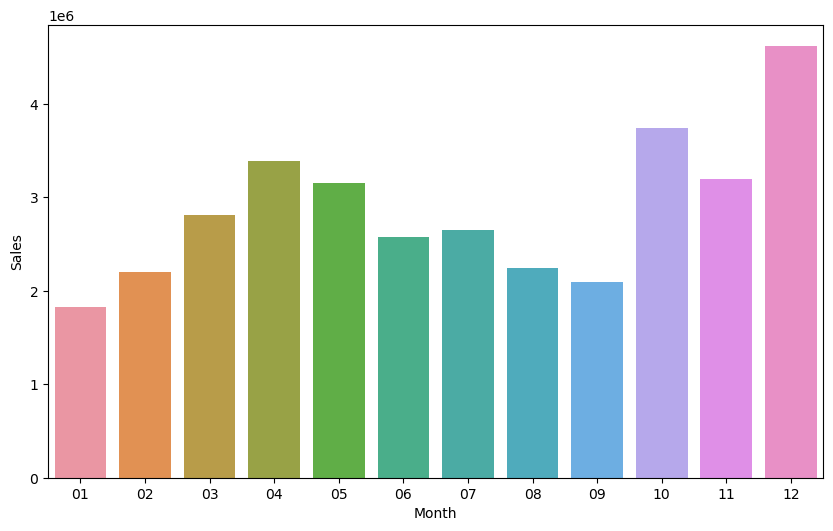

In [8]:
plt.figure(figsize=(10,6),dpi =100)
sns.barplot(data=temp,x='Month',y='Sales');

#### Dec is the month with the highest sales

### Question 2 :  What city had the highest number of sales ?

In [9]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


##### Adding city column 

In [10]:
all_data['City'] = all_data['Purchase Address'].str.split(',').str[1] +" " +all_data['Purchase Address'].str.split(',').str[2].str[0:3]

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston MA
3,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles CA


In [11]:
temp = all_data.groupby('City').sum().sort_values('Sales',ascending=False)
temp.head(1)


,Quantity Ordered,Price Each,Sales
City,,,
San Francisco CA,50239,8.211462e+06,8.262204e+06


In [12]:
# resetting index as i am unable to plot a barplot with Month Being the index

temp = temp.reset_index()
temp.head()

,City,Quantity Ordered,Price Each,Sales
0,San Francisco CA,50239,8.211462e+06,8.262204e+06
1,Los Angeles CA,33289,5.421435e+06,5.452571e+06
2,New York City NY,27932,4.635371e+06,4.664317e+06
3,Boston MA,22528,3.637410e+06,3.661642e+06
4,Atlanta GA,16602,2.779908e+06,2.795499e+06


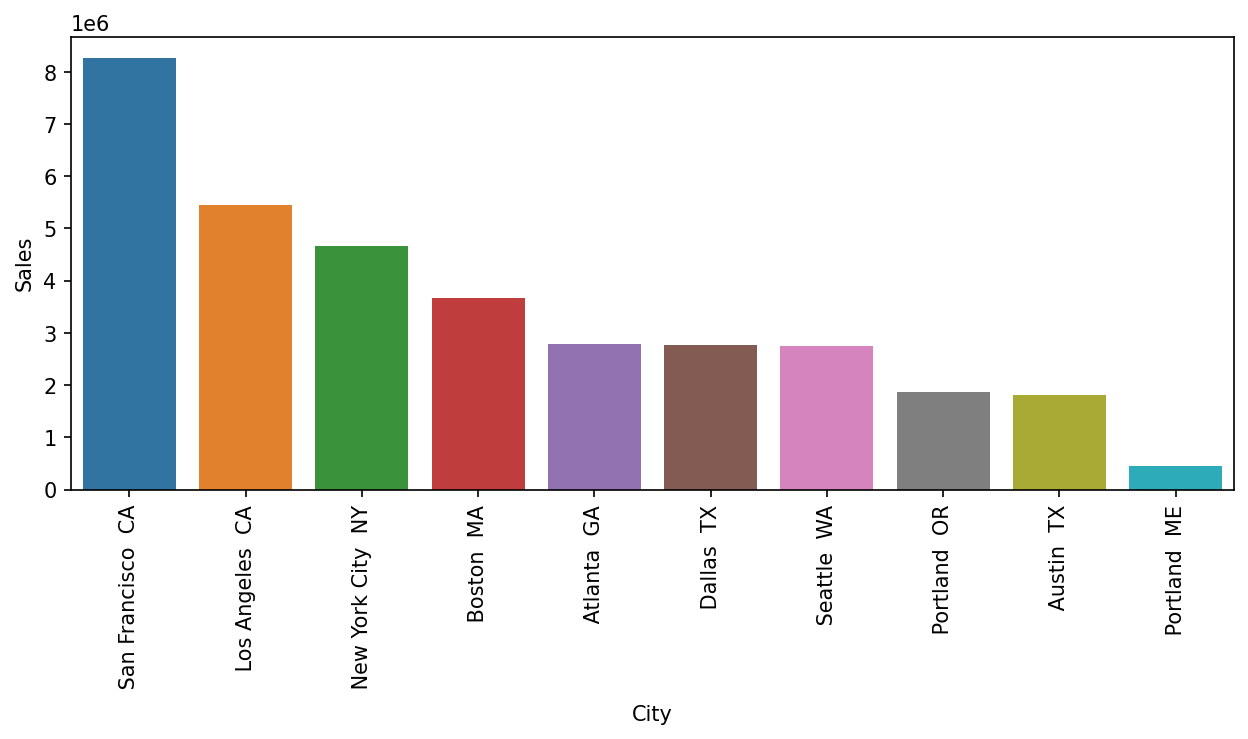

In [13]:
plt.figure(figsize=(10,4),dpi = 150)
sns.barplot(data = temp,x ='City',y ='Sales' );

# rotating the x axis labels as they are too broad
plt.xticks(rotation = 90);

#### Question 2 Answer : San Francisco seems to be having the maximum sales from the above two tables

### Question 3 : What time should we display advertisements to maximize the likelyhood of customer's buying product ?

In [14]:
all_data.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston MA
3,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles CA
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",04,11.95,San Francisco CA
7,176563,Bose SoundSport Headphones,1,99.99,04-02-2019 07:46,"668 Center St, Seattle, WA 98101",04,99.99,Seattle WA
8,176564,USB-C Charging Cable,1,11.95,04-12-2019 10:58,"790 Ridge St, Atlanta, GA 30301",04,11.95,Atlanta GA
9,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",04,1700.00,San Francisco CA
10,176566,Wired Headphones,1,11.99,04-08-2019 14:05,"83 7th St, Boston, MA 02215",04,11.99,Boston MA


   Converting Order Date to datetime

In [15]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [16]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minutes'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles CA,9,27


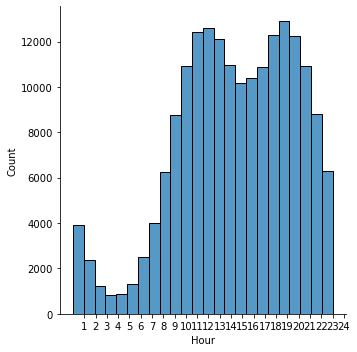

In [17]:
#Creating a list for the number of Hours in a day to use them in x axis lable

hours  =list(range(1,25))
sns.displot(x = 'Hour',data = all_data, bins = 24);

# if i dont plot the list the x axis lable will not show all the hours , it will condense the lables more closely
plt.xticks(hours);

#### Question 3 answer :12 pm and 7 pm are the observed peaks in the above graph ... SO advertisements at this time would be recommended 

### Question 4 : What products are most often sold together ?


In [18]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles CA,9,27


In [23]:
# keeping keep as False to keep all the duplicates
df = all_data[all_data['Order ID'].duplicated(keep= False)]


In [36]:
# creating a  grouped by coloum
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x : ",".join(x))


df.head()

<ipython-input-36-133517fba82f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x : ",".join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes,temp,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles CA,14,38,Google Phone Google Phone,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles CA,14,38,Wired Headphones Wired Headphones,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,600.00,Los Angeles CA,19,42,Google Phone Google Phone,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,11.95,Los Angeles CA,19,42,USB-C Charging Cable USB-C Charging Cable,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",04,99.99,Boston MA,11,31,Bose SoundSport Headphones Bose SoundSport Hea...,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [39]:
# dropping duplicate Order IDs and we have already grouped the products in the Grouped coloumn

df = df[['Order ID','Grouped']]
df = df.drop_duplicates()
df.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [45]:
df.groupby('Grouped').count().sort_values('Order ID',ascending= False)

,Order ID
Grouped,
"iPhone,Lightning Charging Cable",882
"Google Phone,USB-C Charging Cable",856
"iPhone,Wired Headphones",361
"Vareebadd Phone,USB-C Charging Cable",312
"Google Phone,Wired Headphones",303
...,...
"LG Dryer,27in FHD Monitor",1
"LG Dryer,27in 4K Gaming Monitor",1
"Google Phone,Wired Headphones,USB-C Charging Cable",1


####  Question 4 Answer : From the above table we can conclude that iPhone,Lightning Charging Cable products are sold the most together